In [3]:
import pandas as pd

# import data

data_df = pd.read_csv("restaurants_isopen_reduced_infogain.csv")
data_df.head()

,reviewcount,longitude,state,stars,latitude,Friday,Monday,Saturday,Sunday,Thursday,...,lunch,saturday,street,touristy,trendy,upscale,valet,validated,video,isopen
0,(-inf-644.1],(-92.572163--69.498949],ON,(2.2-2.6],(42.874072-45.308688],11:0-3:0,11:0-2:0,11:0-3:0,11:0-2:0,11:0-3:0,...,FALSE,Missing,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,Missing,1
1,(-inf-644.1],(-inf--92.572163],AZ,(2.2-2.6],(-inf-35.570226],10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,...,FALSE,Missing,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,Missing,1
2,(-inf-644.1],(-inf--92.572163],NV,(3.8-4.2],(35.570226-38.004841],11:0-21:30,11:0-21:30,11:0-21:30,11:30-21:0,11:0-21:30,...,TRUE,Missing,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,Missing,0
3,(-inf-644.1],(-92.572163--69.498949],QC,(3.8-4.2],(45.308688-47.743303],6:30-17:0,6:30-17:0,N,N,6:30-17:0,...,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,1
4,(-inf-644.1],(-92.572163--69.498949],ON,(3.4-3.8],(42.874072-45.308688],10:45-22:0,10:45-22:0,10:45-22:0,10:45-22:0,10:45-22:0,...,TRUE,Missing,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,Missing,1


In [4]:
# encode categorical variables into ints

from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

encoder_dict = defaultdict(LabelEncoder)

data_encoded_df = data_df.apply(lambda x: encoder_dict[x.name].fit_transform(x))
data_encoded_df.head()

,reviewcount,longitude,state,stars,latitude,Friday,Monday,Saturday,Sunday,Thursday,...,lunch,saturday,street,touristy,trendy,upscale,valet,validated,video,isopen
0,0,2,15,3,4,132,127,141,135,133,...,0,3,0,0,0,0,2,0,1,1
1,0,3,0,3,0,30,33,41,46,31,...,0,3,0,0,0,0,2,0,1,1
2,0,3,12,6,1,119,119,128,167,121,...,2,3,0,0,0,0,2,0,1,0
3,0,2,17,6,5,624,566,871,792,597,...,1,3,1,1,1,1,3,1,1,1
4,0,2,15,5,4,84,83,92,93,84,...,2,3,0,0,0,0,2,0,1,1


In [6]:
# Split variables and target

from sklearn.preprocessing import label_binarize

X = data_encoded_df.ix[:, range(0, 71)].values
Y = data_encoded_df.ix[:, 71].values

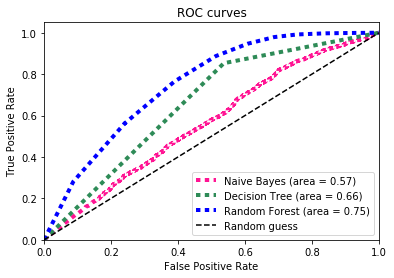

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=3)

# initialize 3 classifiers
nb = MultinomialNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

models = [nb, dt, rf]

colors = cycle(['deeppink', 'seagreen', 'blue'])
model_names = ['Naive Bayes', 'Decision Tree', 'Random Forest']

plt.figure()

for model, color, model_name in zip(models, colors, model_names):
    
    # Learn to predict each class against the other
    y_score = model.fit(X_train, y_train).predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # plot ROC curve
    plt.plot(fpr, tpr,
             label= model_name + ' (area = {0:0.2f})'
                   ''.format(roc_auc),
             color=color, linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plt.show()